# MARCH MAMMAL MADNESS 2021
## Scoring
**Thomas Smallwood** (tomrcsmallwood at gmail dot com)

Compares each competitor's predictions to the results

Scores each round

Outputs summary visualisations:
 - Points over the series of matches
 - Scores by round
 - (Possible points remaining)

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import xkcd_palette


from itertools import chain

In [2]:
submissions = pd.read_csv("Submissions/CollatedSubmissions.csv", index_col = "Match")

results = pd.read_excel("Results/MMM_2021_Bracket_RESULTS.xlsx", sheet_name = "RESULTS", index_col = "Match")

results.columns = ["Results"]

results = pd.merge(results, submissions, right_index = True, left_index = True)

results.dropna(inplace = True)

display(results)


,Results,Dani,Ellie,Hellen,Isla,Jamie,Phil,Tom
Match,,,,,,,,
WC,Southern Red-Backed Vole,Hopi Chipmunk,Southern Red-Backed Vole,Hopi Chipmunk,Southern Red-Backed Vole,Hopi Chipmunk,Hopi Chipmunk,Hopi Chipmunk
A11,Dugong,Dugong,Dugong,Dugong,Dugong,Dugong,Colo Colo Opossom,Dugong
A12,Musk Deer,Aodad,Aodad,Aodad,Aodad,Aodad,Aodad,Aoudad
A13,Egyptian Fruit Bat,Egyptian Fruit Bat,Kinda Baboon,Egyptian Fruit Bat,Kinda Baboon,Kinda Baboon,Kinda Baboon,Kinda Baboon
A14,Solenodon,Malagasy Striped Civet,Solenodon,Malagasy Striped Civet,Malagasy Striped Civet,Malagasy Striped Civet,Malagasy Striped Civet,Malagasy Striped Civet
A15,Jaguarundi,Jaguarundi,Jaguarundi,Jaguarundi,Jaguarundi,Jaguarundi,Jaguarundi,Jaguarundi
A16,Mountain Tapir,Mountain Tapir,Common Treeshrew,Mountain Tapir,Mountain Tapir,Mountain Tapir,Mountain Tapir,Mountain Tapir
A17,Mara,Mara,Tarsier,Mara,Tarsier,Mara,Mara,Mara
A18,Red Wolf,Red Wolf,Red Wolf,Red Wolf,Red Wolf,Red Wolf,Red Wolf,Red Wolf


In [3]:
rounds = [["Wild Card"], ["Round 1"]*8*4, ["Round 2"]*4*4, ["Round 3"]*2*4,["Quarter Final"]*4,["Semi Final"]*2, ["Final"]]

rounds = list(chain.from_iterable(rounds))

points_dict = {"Wild Card" : 1, "Round 1" : 1, "Round 2" : 2, "Round 3" : 3, "Quarter Final" : 5, "Semi Final" : 8, "Final" : 13}

points = [points_dict.get(r) for r in rounds]

In [4]:
scores = pd.DataFrame(index = results.index)

for p in results.columns[1:]:
    scores[p] = (results["Results"] == results[p]) * points[:results.shape[0]]
    
scores.tail()

,Dani,Ellie,Hellen,Isla,Jamie,Phil,Tom
Match,,,,,,,
B32,3,3,0,0,3,3,3
C31,3,0,0,0,3,3,3
C32,0,3,0,0,0,0,0
D31,0,0,0,0,3,3,3
D32,3,0,0,0,0,0,0


,CurrentScore,MaxScore
Participant,,
Dani,65,114
Ellie,38,43
Hellen,32,32
Isla,43,69
Jamie,51,69
Phil,55,99
Tom,52,78


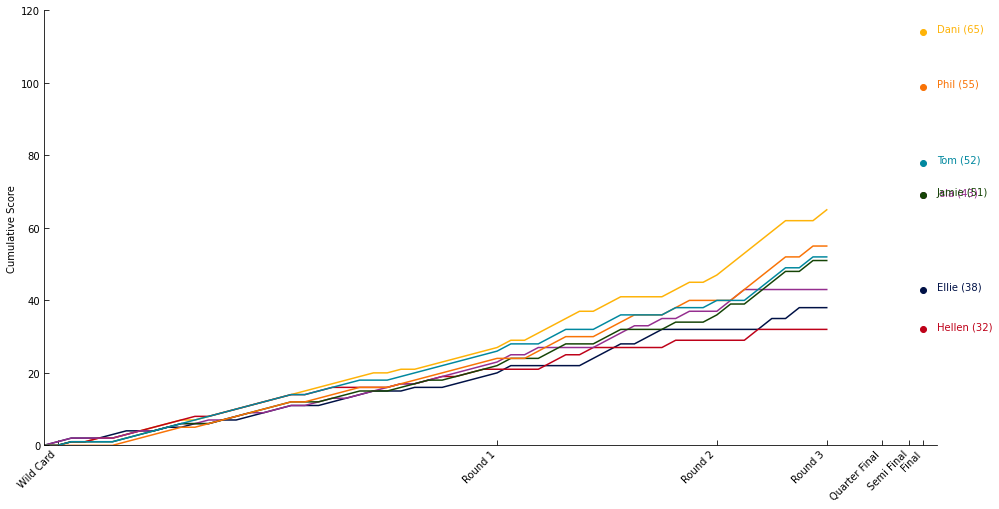

In [5]:
cumulative_scores = scores.cumsum()

cumulative_scores['MatchNumber'] = np.arange(1, len(cumulative_scores)+1)

cumulative_scores.loc["0"] = [0]*cumulative_scores.shape[1]

summary_scores = pd.DataFrame({"CurrentScore" : cumulative_scores.loc[cumulative_scores["MatchNumber"].idxmax()]}).iloc[:-1,:]

summary_scores["Participant"] = cumulative_scores.columns[:-1]

def calc_max_score(p):
    
    to_come = submissions[p].iloc[results.shape[0]:]

    remaining_points = ((to_come.isin(results[p][results[p] != results["Results"]].unique()) == False) * points[results.shape[0]:]).sum()
    
    max_points = cumulative_scores[p].max() + remaining_points
    
    return max_points

max_scores = pd.DataFrame({"Participant" : cumulative_scores.columns[:-1]})

summary_scores["MaxScore"] = summary_scores["Participant"].apply(calc_max_score)

summary_scores.set_index("Participant", inplace = True)

display(summary_scores)

cumulscores_plot = cumulative_scores.melt(id_vars = "MatchNumber", var_name  = "Participant", value_name = "CumulativeScore")

participtant_palette = xkcd_palette(["amber", "navy blue", "scarlet", "warm purple", "forrest green", "orange", "teal blue"])

fig = plt.figure(figsize= (16, 8))

ax = sns.lineplot(data = cumulscores_plot, x = 'MatchNumber', y = 'CumulativeScore', hue = "Participant", palette= participtant_palette)

ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False) 

ax.set(ylabel='Cumulative Score', xlabel='')

ax.set_xlim(0, len(rounds)+1)
ax.set_ylim(0, np.ceil(summary_scores["MaxScore"].max()/10)*10)

ax.tick_params(direction='in', length=5)

round_starts = pd.DataFrame(pd.Categorical(rounds, ordered=True, categories=["Wild Card", "Round 1", "Round 2", "Round 3","Quarter Final","Semi Final", "Final"])).groupby(0).size().cumsum()

plt.xticks(round_starts, round_starts.index, rotation=45, ha = "right")
#ax.xaxis.set(ticks = round_starts, ticklabels = round_starts.index)

for p in range(len(cumulative_scores.columns[:-1])):
    ax.text(len(rounds)+1, summary_scores["MaxScore"].iloc[p], f'{cumulative_scores.columns[p]} ({summary_scores["CurrentScore"].iloc[p]})' , color = participtant_palette[p])
    ax.scatter(len(rounds), summary_scores["MaxScore"].iloc[p], color = participtant_palette[p])

ax.get_legend().remove()

plt.show()

fig.savefig("Results/CumulativeScores.png", bbox_inches = "tight", facecolor = "white")

In [6]:
summary_scores["CurrentScore"].iloc[p]



52